In [1]:
# 量子位相推定を量子回路で構築するソースコード
# 必要なモジュールをインポート
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter
import warnings
warnings.simplefilter('ignore')

In [2]:
# 逆量子フーリエ変換関数を用意
def qft_rotate_single_inv(circuit, i, n):
    if n == 0:
        return circuit
    for qubit in range(0, i):
        circuit.cp(-pi/2**(i - qubit), qubit, i)
    circuit.h(i)
        
def qft_dagger(circuit, n):
    for i in range(math.floor(n/2)):
        circuit.swap(i, n - (i + 1))
    for i in range(n):
        qft_rotate_single_inv(circuit, i, n)

In [3]:
# 求めたい固有値の位相角をエンコードする量子ビット数
n_encode = 4 
# 固有状態の量子ビット数
n_eigstate = 1 
n = n_encode + n_eigstate
phase = np.random.rand() * np.pi
theta = Parameter('θ\'')
# 量子回路を生成する。
qc = QuantumCircuit(n, n_encode)
# NOTゲートを適用させる。
qc.x(n_encode) 

for qubit in range(n_encode):
    qc.h(qubit)

repetitions = 1
for count in range(n_encode):
    for i in range(repetitions):
        qc.cp(theta, count, n_encode)
    repetitions *= 2

qc.barrier()
qft_dagger(qc, n_encode)

qc.barrier()
for n in range(n_encode):
    qc.measure(n,n)

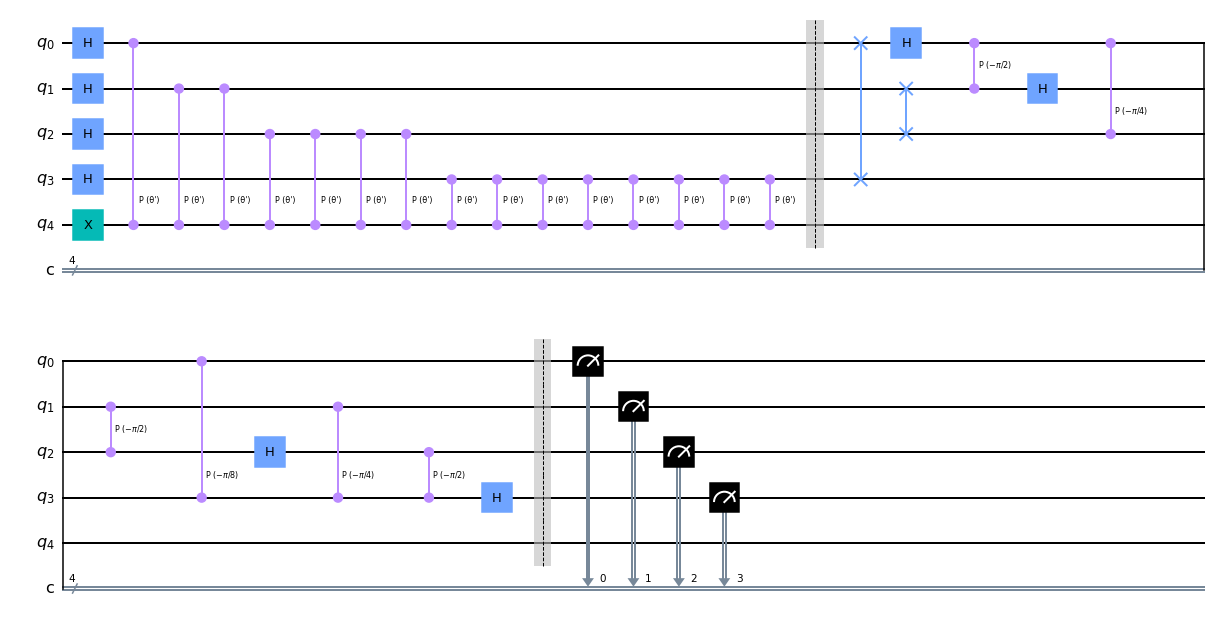

In [4]:
qc.draw(output='mpl')

True Phase: 3.01


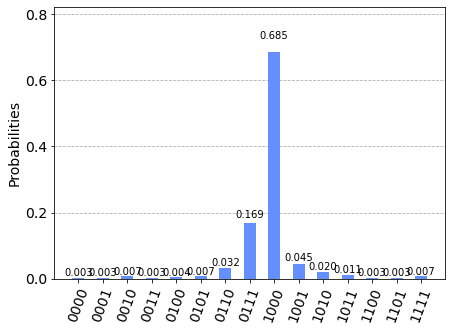

In [5]:
qc_parametrized = [qc.bind_parameters({theta: phase}) for i in range(2**n_encode - 1)][-1]
# マシンを実行して実行する。
backend = Aer.get_backend('qasm_simulator')
shots = 1042
results = execute(qc_parametrized, backend=backend, shots=shots).result()
answer = results.get_counts()
# プロットする。
print('True Phase: {:.2f}'.format(phase))
plot_histogram(answer)

In [6]:
ans_idx = np.argmax(list(results.get_counts().values()))
phase_estimated = ans_idx / (2 ** n_encode)
print('True phase: {:.4f}'.format(phase / (2 * np.pi)))
print('Estimated phase: {:.4f}'.format(phase_estimated))

True phase: 0.4792
Estimated phase: 0.8750
